Попробуем обучить модель опорных векторов для классификации различных цветков в наборе данных Iris. 

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [7]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Метки классов:', np.unique(y))

Метки классов: [0 1 2]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #Настроим генератор маркеров и карту цветов
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Вывести поверхность решения
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),np.arange(x2_min,x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl,0], y = X[y == cl, 1], alpha=0.8,c=colors[idx], marker = markers[idx], label=cl, edgecolors='black')
        
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',edgecolor='black',alpha=1.0, linewidths=1, marker='o',s=100, label='Испытательный набор')

In [17]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))

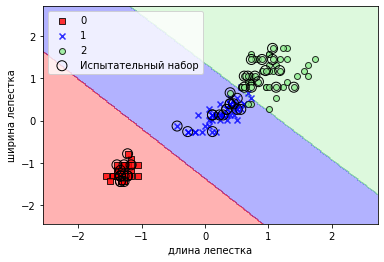

In [19]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('длина лепестка')
plt.ylabel('ширина лепестка')
plt.legend(loc='upper left')
plt.show()

Попробуем сравнить алгоритм опорных векторов, с алгоритмом основанном на стохастическом градиентном спуске

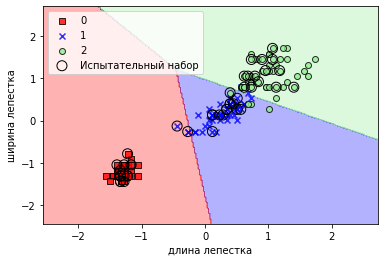

In [23]:
ppn = SGDClassifier(loss='perceptron')
ppn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('длина лепестка')
plt.ylabel('ширина лепестка')
plt.legend(loc='upper left')
plt.show()

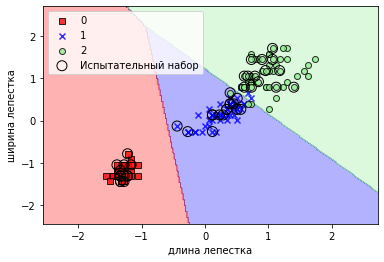

In [25]:
lr = SGDClassifier(loss='log')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('длина лепестка')
plt.ylabel('ширина лепестка')
plt.legend(loc='upper left')
plt.show()

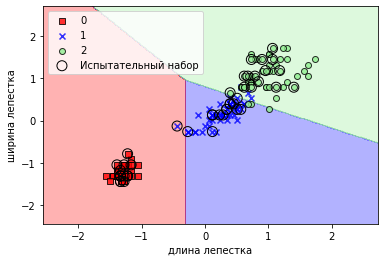

In [26]:
sv = SGDClassifier(loss='hinge')
sv.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=sv, test_idx=range(105,150))
plt.xlabel('длина лепестка')
plt.ylabel('ширина лепестка')
plt.legend(loc='upper left')
plt.show()

#### Ядерный метод опорных векторов
Данный метод предназначен для решения нелинейных задач. 
Построим пример набора данных. 

In [27]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

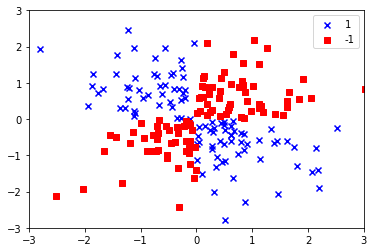

In [28]:
plt.scatter(X_xor[y_xor == 1,0], X_xor[y_xor == 1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor == -1,0], X_xor[y_xor == -1,1],c='r',marker='s',label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

Как можем заметить, что применив линейную гиперплоскость в качестве границы решений мы не сможем хорошо разделить образцы. 
Базовая идея ядерных методов, заключается в создании нелинейных комбинаций исходных признаков с целью их проецирования на пространство более высокой размерности через отображаемую функцию, где они становятся линейно сепарабельными (разделимы). 

В нашем случае попробуем использовать один из самых широко применяемых ядер - радиальной базисной функции(Radial Basis Function - RBF), или как его еще называют - гауссовым ядром. 

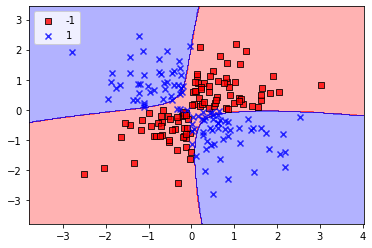

In [33]:
svm = SVC(kernel='rbf',random_state=1, gamma=0.1, C=10.0)
# параметр gamma - параметр отсечения для гауссовой сферы, чем больше значение тем больше влияние обучающих образцов
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

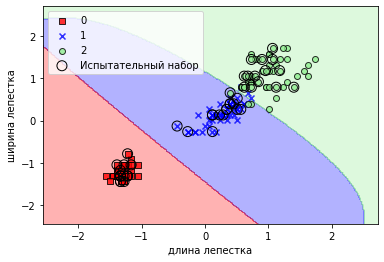

In [34]:
svm = SVC(kernel='rbf',random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('длина лепестка')
plt.ylabel('ширина лепестка')
plt.legend(loc='upper left')
plt.show()

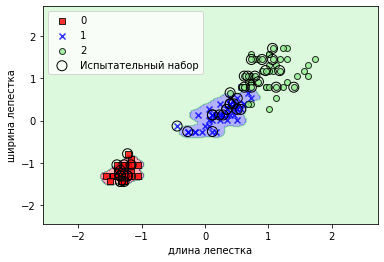

In [35]:
svm = SVC(kernel='rbf',random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('длина лепестка')
plt.ylabel('ширина лепестка')
plt.legend(loc='upper left')
plt.show()

На последнем графике видно, что при относительно большом значении gamma, граница решений между классами оказывается гораздо компактнее, однако скорее всего будет иметь высокую ошибку для ранее не встречающихся данных, что говорит нам о том, что gamma играет важную роль в контролировании переобучения. 